# Sphere $\mathbb{S}^2$

This notebook demonstrates some differential geometry capabilities of SageMath on the example of the 2-dimensional sphere. The corresponding tools have been developed within
the  [SageManifolds](http://sagemanifolds.obspm.fr) project.

Click [here](https://raw.githubusercontent.com/sagemanifolds/SageManifolds/master/Worksheets/v1.3/SM_sphere_S2.ipynb) to download the notebook file (ipynb format). To run it, you must start SageMath with the Jupyter interface, via the command `sage -n jupyter`

*NB:* a version of SageMath at least equal to 7.5 is required to run this notebook:

In [1]:
version()

'SageMath version 8.8, Release Date: 2019-06-26'

First we set up the notebook to display math formulas using LaTeX formatting:

In [2]:
%display latex

We also define a viewer for 3D plots (use `'threejs'` or `'jmol'` for interactive 3D graphics):

In [3]:
viewer3D = 'threejs' # must be 'threejs', jmol', 'tachyon' or None (default)

## $\mathbb{S}^2$ as a 2-dimensional differentiable manifold

We start by declaring $\mathbb{S}^2$ as a differentiable manifold of dimension 2 over $\mathbb{R}$:

In [4]:
S2 = Manifold(2, 'S^2', latex_name=r'\mathbb{S}^2', start_index=1)

<p>The first argument, 2, is the dimension of the manifold, while the second argument is the symbol used to label the manifold.</p>
<p>The argument <span style="font-family: courier new,courier;">start_index</span> sets the index range to be used on the manifold for labelling components w.r.t. a basis or a frame: <span style="font-family: courier new,courier;">start_index=1</span> corresponds to $\{1,2\}$; the default value is <span style="font-family: courier new,courier;">start_index=0</span> and yields to $\{0,1\}$.</p>

In [5]:
print(S2)

2-dimensional differentiable manifold S^2


In [6]:
S2

2-dimensional differentiable manifold S^2

The manifold is a `Parent` object:

In [7]:
isinstance(S2, Parent)

True

<p>in the category of smooth manifolds over $\mathbb{R}$:</p>

In [8]:
S2.category()

Category of smooth manifolds over Real Field with 53 bits of precision

### Coordinate charts on $\mathbb{S}^2$

The sphere cannot be covered by a single chart. At least two charts are necessary, for instance the charts associated with the stereographic projections from the North pole and the South pole respectively. Let us introduce the open subsets covered by these two charts: 
$$ U := \mathbb{S}^2\setminus\{N\}, $$  
$$ V := \mathbb{S}^2\setminus\{S\}, $$
where $N$ is a point of $\mathbb{S}^2$, which we shall call the <em>North pole</em>, and $S$ is the point of $U$ of stereographic coordinates $(0,0)$, which we call the <em>South pole</em>:

In [9]:
U = S2.open_subset('U') ; print(U)

Open subset U of the 2-dimensional differentiable manifold S^2


In [10]:
V = S2.open_subset('V') ; print(V)

Open subset V of the 2-dimensional differentiable manifold S^2


<p>We declare that $\mathbb{S}^2 = U \cup V$:</p>

In [11]:
S2.declare_union(U, V)

<p>Then we declare the stereographic chart on $U$, denoting by $(x,y)$ the coordinates resulting from the stereographic projection from the North pole:</p>

In [12]:
stereoN.<x,y> = U.chart()

The expression `.<x,y>` in the left-hand side means that the Python variables `x` and `y` are set to the two coordinates of the chart. This allows one to refer subsequently to the coordinates by their names. In the present case, the function `chart()` has no argument, which implies that the coordinate symbols will be `x` and `y` (i.e. exactly the characters appearing in the `<...>` operator) and that each coordinate range is $(-\infty,+\infty)$. As we will see below, for other cases, an argument must be passed to `chart()`  to specify each coordinate symbol and range, as well as some specific LaTeX symbol.

In [13]:
stereoN

Chart (U, (x, y))

The coordinates can be accessed individually, either by means of their indices in the chart ( following the convention `start_index=1` set in the manifold's definition) or by their names as Python variables:

In [14]:
stereoN[1]

x

In [15]:
y is stereoN[2]

True

<p>Similarly, we introduce on $V$ the coordinates $(x',y')$ corresponding to the stereographic projection from the South pole:</p>

In [16]:
stereoS.<xp,yp> = V.chart("xp:x' yp:y'")

In this case, the string argument passed to `chart` stipulates that the text-only names of the coordinates are xp and yp (same as the Python variables names defined within the `<...>` operator in the left-hand side), while their LaTeX names are $x'$ and $y'$.

In [17]:
stereoS

Chart (V, (xp, yp))

<p>At this stage, the user's atlas on the manifold has two charts:</p>

In [18]:
S2.atlas()

[Chart (U, (x, y)), Chart (V, (xp, yp))]

<p>We have to specify the <strong>transition map</strong> between the charts 'stereoN' = $(U,(x,y))$ and 'stereoS' = $(V,(x',y'))$; it is given by the standard inversion formulas:</p>

In [19]:
stereoN_to_S = stereoN.transition_map(stereoS, 
                                      (x/(x^2+y^2), y/(x^2+y^2)), 
                                      intersection_name='W',
                                      restrictions1= x^2+y^2!=0, 
                                      restrictions2= xp^2+yp^2!=0)
stereoN_to_S.display()

xp = x/(x^2 + y^2)
yp = y/(x^2 + y^2)

In the above declaration, 'W' is the name given to the chart-overlap subset: $W := U\cap V$, the condition $x^2+y^2 \not=0$  defines $W$ as a subset of $U$, and the condition $x'^2+y'^2\not=0$ defines $W$ as a subset of $V$.

The inverse coordinate transformation is computed by means of the method `inverse()`:

In [20]:
stereoS_to_N = stereoN_to_S.inverse()
stereoS_to_N.display()

x = xp/(xp^2 + yp^2)
y = yp/(xp^2 + yp^2)

<p>In the present case, the situation is of course perfectly symmetric regarding the coordinates $(x,y)$ and $(x',y')$.</p>
<p>At this stage, the user's atlas has four charts:</p>

In [21]:
S2.atlas()

[Chart (U, (x, y)),
 Chart (V, (xp, yp)),
 Chart (W, (x, y)),
 Chart (W, (xp, yp))]

<p>Let us store $W = U\cap V$ into a Python variable for future use:</p>

In [22]:
W = U.intersection(V)

<p>Similarly we store the charts $(W,(x,y))$ (the restriction of  $(U,(x,y))$ to $W$) and $(W,(x',y'))$ (the restriction of $(V,(x',y'))$ to $W$) into Python variables:</p>

In [23]:
stereoN_W = stereoN.restrict(W)
stereoN_W

Chart (W, (x, y))

In [24]:
stereoS_W = stereoS.restrict(W)
stereoS_W

Chart (W, (xp, yp))

<p>We may plot the chart $(W, (x',y'))$ in terms of itself, as a grid:</p>

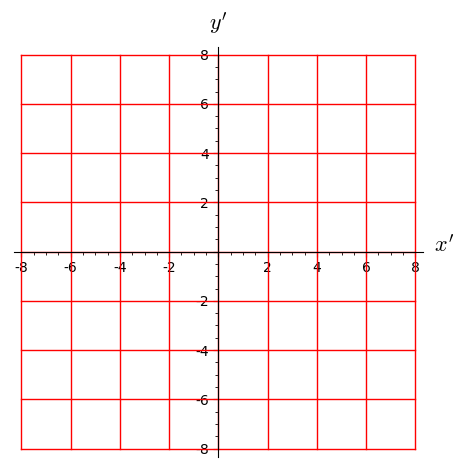

In [25]:
stereoS_W.plot()

<p>More interestingly, let us plot the stereographic chart $(x',y')$ in terms of the stereographic chart $(x,y)$ on the domain $W$ where both systems overlap (we split the plot in four parts to avoid the singularity at $(x',y')=(0,0)$):</p>

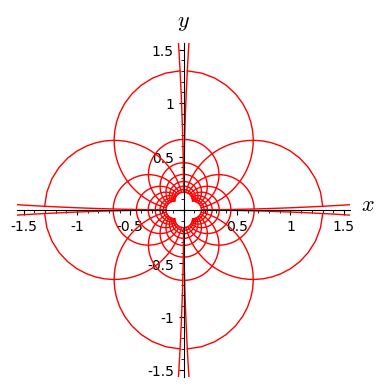

In [26]:
graphSN1 = stereoS_W.plot(stereoN, ranges={xp:[-6,-0.02], yp:[-6,-0.02]})
graphSN2 = stereoS_W.plot(stereoN, ranges={xp:[-6,-0.02], yp:[0.02,6]})
graphSN3 = stereoS_W.plot(stereoN, ranges={xp:[0.02,6], yp:[-6,-0.02]})
graphSN4 = stereoS_W.plot(stereoN, ranges={xp:[0.02,6], yp:[0.02,6]})
show(graphSN1+graphSN2+graphSN3+graphSN4,
     xmin=-1.5, xmax=1.5, ymin=-1.5, ymax=1.5)

<h3>Spherical coordinates</h3>
<p>The standard spherical (or polar) coordinates $(\theta,\phi)$ are defined on the open domain $A\subset W \subset \mathbb{S}^2$ that is the complement of the "origin meridian"; since the latter is the half-circle defined by $y=0$ and $x\geq 0$, we declare:</p>

In [27]:
A = W.open_subset('A', coord_def={stereoN_W: (y!=0, x<0), 
                                  stereoS_W: (yp!=0, xp<0)})
print(A)

Open subset A of the 2-dimensional differentiable manifold S^2


<p>The restriction of the stereographic chart from the North pole to $A$ is</p>

In [28]:
stereoN_A = stereoN_W.restrict(A)
stereoN_A

Chart (A, (x, y))

<p>We then declare the chart $(A,(\theta,\phi))$ by specifying the intervals $(0,\pi)$ and $(0,2\pi)$ spanned by respectively $\theta$ and $\phi$:</p>

In [29]:
spher.<th,ph> = A.chart(r'th:(0,pi):\theta ph:(0,2*pi):\phi') ; spher

Chart (A, (th, ph))

<p>The specification of the spherical coordinates is completed by providing the transition map with the stereographic chart $(A,(x,y))$:</p>

In [30]:
spher_to_stereoN = spher.transition_map(stereoN_A, 
                                        (sin(th)*cos(ph)/(1-cos(th)),
                                         sin(th)*sin(ph)/(1-cos(th))))
spher_to_stereoN.display()

x = -cos(ph)*sin(th)/(cos(th) - 1)
y = -sin(ph)*sin(th)/(cos(th) - 1)

We also provide the inverse transition map, asking to check that the provided formulas are indeed correct (argument `verbose=True`):

In [31]:
spher_to_stereoN.set_inverse(2*atan(1/sqrt(x^2+y^2)), atan2(-y,-x)+pi,
                             verbose=True)

Check of the inverse coordinate transformation:
  th == 2*arctan(sqrt(-cos(th) + 1)/sqrt(cos(th) + 1))
  ph == pi + arctan2(sin(ph)*sin(th)/(cos(th) - 1), cos(ph)*sin(th)/(cos(th) - 1))
  x == x
  y == y


The check is passed, modulo some lack of trigonometric simplifications in the first two lines.

In [32]:
spher_to_stereoN.inverse().display()

th = 2*arctan(1/sqrt(x^2 + y^2))
ph = pi + arctan2(-y, -x)

The transition map $(A,(\theta,\phi))\rightarrow (A,(x',y'))$ is obtained by combining the transition maps $(A,(\theta,\phi))\rightarrow (A,(x,y))$ and $(A,(x,y))\rightarrow (A,(x',y'))$:

In [33]:
stereoN_to_S_A = stereoN_to_S.restrict(A)
spher_to_stereoS = stereoN_to_S_A * spher_to_stereoN
spher_to_stereoS.display()

xp = -(cos(ph)*cos(th) - cos(ph))/sin(th)
yp = -(cos(th)*sin(ph) - sin(ph))/sin(th)

Similarly, the transition map $(A,(x',y'))\rightarrow (A,(\theta,\phi))$ is obtained by combining the transition maps $(A,(x',y'))\rightarrow (A,(x,y))$ and $(A,(x,y))\rightarrow (A,(\theta,\phi))$:

In [34]:
stereoS_to_N_A = stereoN_to_S.inverse().restrict(A)
stereoS_to_spher = spher_to_stereoN.inverse() * stereoS_to_N_A 
stereoS_to_spher.display()

th = 2*arctan(sqrt(xp^2 + yp^2))
ph = pi - arctan2(yp/(xp^2 + yp^2), -xp/(xp^2 + yp^2))

<p>The user atlas of $\mathbb{S}^2$ is now</p>

In [35]:
S2.atlas()

[Chart (U, (x, y)),
 Chart (V, (xp, yp)),
 Chart (W, (x, y)),
 Chart (W, (xp, yp)),
 Chart (A, (x, y)),
 Chart (A, (xp, yp)),
 Chart (A, (th, ph))]

<p>Let us draw the grid of spherical coordinates $(\theta,\phi)$ in terms of stereographic coordinates from the North pole $(x,y)$:</p>

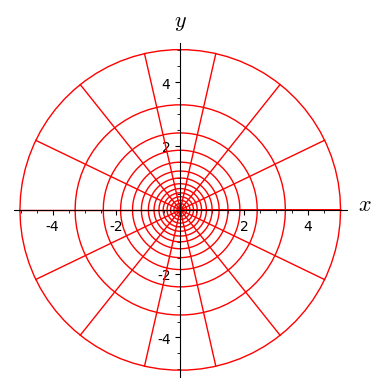

In [36]:
spher.plot(stereoN, number_values=15, ranges={th: (pi/8,pi)})

<p>Conversly, we may represent the grid of the stereographic coordinates $(x,y)$ restricted to $A$ in terms of the spherical coordinates $(\theta,\phi)$. We limit ourselves to one quarter (cf. the argument<span style="font-family: courier new,courier;"> ranges</span>):</p>

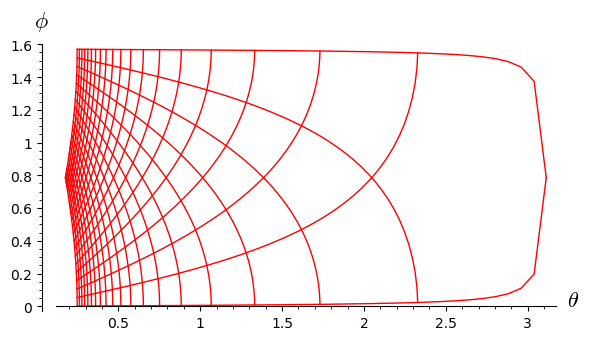

In [37]:
stereoN_A.plot(spher, ranges={x: (0.01,8), y: (0.01,8)}, number_values=20, plot_points=200)

<h2>Points on $\mathbb{S}^2$</h2>
<p>We declare the <strong>North pole</strong> (resp. the <strong>South pole</strong>) as the point of coordinates $(0,0)$ in the chart $(V,(x',y'))$ (resp. in the chart $(U,(x,y))$):</p>

In [38]:
N = V.point((0,0), chart=stereoS, name='N') ; print(N)
S = U.point((0,0), chart=stereoN, name='S') ; print(S)

Point N on the 2-dimensional differentiable manifold S^2
Point S on the 2-dimensional differentiable manifold S^2


<p>Since points are Sage <span style="font-family: courier new,courier;">Element</span>'s, the corresponding <span style="font-family: courier new,courier;">Parent</span> being the manifold subsets, an equivalent writing of the above declarations is</p>

In [39]:
N = V((0,0), chart=stereoS, name='N') ; print(N)
S = U((0,0), chart=stereoN, name='S') ; print(S)

Point N on the 2-dimensional differentiable manifold S^2
Point S on the 2-dimensional differentiable manifold S^2


<p>Moreover, since stereoS in the default chart on $V$ and stereoN is the default one on $U$, their mentions can be omitted, so that the above can be shortened to</p>

In [40]:
N = V((0,0), name='N') ; print(N)
S = U((0,0), name='S') ; print(S)

Point N on the 2-dimensional differentiable manifold S^2
Point S on the 2-dimensional differentiable manifold S^2


In [41]:
N.parent()

Open subset V of the 2-dimensional differentiable manifold S^2

In [42]:
S.parent()

Open subset U of the 2-dimensional differentiable manifold S^2

<p>We have of course</p>

In [43]:
N in V

True

In [44]:
N in S2

True

In [45]:
N in U

False

In [46]:
N in A

False

<p>Let us introduce some point at the equator:</p>

In [47]:
E = S2((0,1), chart=stereoN, name='E')

<p>The point $E$ is in the open subset $A$:</p>

In [48]:
E in A

True

<p>We may then ask for its spherical coordinates $(\theta,\phi)$:</p>

In [49]:
E.coord(spher)

(1/2*pi, 1/2*pi)

<p>which is not possible for the point $N$:</p>

In [50]:
try:
    N.coord(spher)
except ValueError as exc:
    print('Error: ' + str(exc))

Error: the point does not belong to the domain of Chart (A, (th, ph))


<h2>Maps between manifolds: the embedding of $\mathbb{S}^2$ into $\mathbb{R}^3$</h2>
<p>Let us first declare $\mathbb{R}^3$ as a 3-dimensional manifold covered by a single chart (the so-called<strong> Cartesian coordinates</strong>):</p>

In [51]:
R3 = Manifold(3, 'R^3', r'\mathbb{R}^3', start_index=1)
cart.<X,Y,Z> = R3.chart() ; cart

Chart (R^3, (X, Y, Z))

<p>The embedding of the sphere is defined as a differential map $\Phi: \mathbb{S}^2 \rightarrow \mathbb{R}^3$:</p>

In [52]:
Phi = S2.diff_map(R3, {(stereoN, cart): 
                       [2*x/(1+x^2+y^2), 2*y/(1+x^2+y^2),
                        (x^2+y^2-1)/(1+x^2+y^2)],
                       (stereoS, cart): 
                       [2*xp/(1+xp^2+yp^2), 2*yp/(1+xp^2+yp^2),
                        (1-xp^2-yp^2)/(1+xp^2+yp^2)]},
                  name='Phi', latex_name=r'\Phi')

In [53]:
Phi.display()

Phi: S^2 --> R^3
on U: (x, y) |--> (X, Y, Z) = (2*x/(x^2 + y^2 + 1), 2*y/(x^2 + y^2 + 1), (x^2 + y^2 - 1)/(x^2 + y^2 + 1))
on V: (xp, yp) |--> (X, Y, Z) = (2*xp/(xp^2 + yp^2 + 1), 2*yp/(xp^2 + yp^2 + 1), -(xp^2 + yp^2 - 1)/(xp^2 + yp^2 + 1))

In [54]:
Phi.parent()

Set of Morphisms from 2-dimensional differentiable manifold S^2 to 3-dimensional differentiable manifold R^3 in Category of smooth manifolds over Real Field with 53 bits of precision

In [55]:
print(Phi.parent())

Set of Morphisms from 2-dimensional differentiable manifold S^2 to 3-dimensional differentiable manifold R^3 in Category of smooth manifolds over Real Field with 53 bits of precision


In [56]:
Phi.parent() is Hom(S2, R3)

True

<p>$\Phi$ maps points of $\mathbb{S}^2$ to points of $\mathbb{R}^3$:</p>

In [57]:
N1 = Phi(N) ; print(N1) ; N1 ; N1.coord()

Point Phi(N) on the 3-dimensional differentiable manifold R^3


(0, 0, 1)

In [58]:
S1 = Phi(S) ; print(S1) ; S1 ; S1.coord()

Point Phi(S) on the 3-dimensional differentiable manifold R^3


(0, 0, -1)

In [59]:
E1 = Phi(E) ; print(E1) ; E1 ; E1.coord()

Point Phi(E) on the 3-dimensional differentiable manifold R^3


(0, 1, 0)

<p>$\Phi$ has been defined in terms of the stereographic charts $(U,(x,y))$ and $(V,(x',y'))$, but we may ask its expression in terms of spherical coordinates. The latter is then computed by means of the transition map $(A,(x,y))\rightarrow (A,(\theta,\phi))$:</p>

In [60]:
Phi.expr(stereoN_A, cart)

(2*x/(x^2 + y^2 + 1), 2*y/(x^2 + y^2 + 1), (x^2 + y^2 - 1)/(x^2 + y^2 + 1))

In [61]:
Phi.expr(spher, cart)

(cos(ph)*sin(th), sin(ph)*sin(th), cos(th))

In [62]:
Phi.display(spher, cart)

Phi: S^2 --> R^3
on A: (th, ph) |--> (X, Y, Z) = (cos(ph)*sin(th), sin(ph)*sin(th), cos(th))

<p>Let us use $\Phi$ to draw the grid of spherical coordinates $(\theta,\phi)$ in terms of the Cartesian coordinates $(X,Y,Z)$ of $\mathbb{R}^3$:</p>

In [63]:
graph_spher = spher.plot(chart=cart, mapping=Phi, number_values=11, 
                         color='blue', label_axes=False)
show(graph_spher, viewer=viewer3D)

Graphics3d Object

<p>We may also use the embedding $\Phi$ to display the stereographic coordinate grid in terms of the Cartesian coordinates in $\mathbb{R}^3$. First for the stereographic coordinates from the North pole:</p>

In [64]:
graph_stereoN = stereoN.plot(chart=cart, mapping=Phi, number_values=25, 
                             label_axes=False)
show(graph_stereoN, viewer=viewer3D)

Graphics3d Object

<p>and then have a view with the stereographic coordinates from the South pole superposed (in green):</p>

In [65]:
graph_stereoS = stereoS.plot(chart=cart, mapping=Phi, number_values=25, 
                             color='green', label_axes=False)
show(graph_stereoN + graph_stereoS, viewer=viewer3D)

Graphics3d Object

<p>We may also add the two poles to the graphic:</p>

In [66]:
pointN = N.plot(chart=cart, mapping=Phi, color='red', 
                label_offset=0.05)
pointS = S.plot(chart=cart, mapping=Phi, color='green', 
                label_offset=0.05)
show(graph_stereoN + graph_stereoS + pointN + pointS, viewer=viewer3D)

Graphics3d Object

<h2>Tangent spaces</h2>
<p>The tangent space to the manifold $\mathbb{S}^2$ at the point $N$ is</p>

In [67]:
T_N = S2.tangent_space(N)
print(T_N) ; T_N

Tangent space at Point N on the 2-dimensional differentiable manifold S^2


Tangent space at Point N on the 2-dimensional differentiable manifold S^2

<p>$T_N \mathbb{S}^2$ is a vector space over $\mathbb{R}$ (represented here by Sage's symbolic ring SR):</p>

In [68]:
print(T_N.category())

Category of finite dimensional vector spaces over Symbolic Ring


<p>Its dimension equals the manifold's dimension:</p>

In [69]:
dim(T_N)

2

In [70]:
dim(T_N) == dim(S2)

True

<p>$T_N \mathbb{S}^2$ is endowed with a basis inherited from the coordinate frame defined around $N$, namely the frame associated with the chart $(V,(x',y'))$:</p>

In [71]:
T_N.bases()

[Basis (d/dxp,d/dyp) on the Tangent space at Point N on the 2-dimensional differentiable manifold S^2]

<p>$(V,(x',y'))$ is the only chart defined so far around the point $N$. If various charts have been defined around a point, then the tangent space at this point is automatically endowed with the bases inherited from the coordinate frames associated to all these charts. For instance, for the equator point $E$:</p>

In [72]:
T_E = S2.tangent_space(E)
print(T_E) ; T_E

Tangent space at Point E on the 2-dimensional differentiable manifold S^2


Tangent space at Point E on the 2-dimensional differentiable manifold S^2

In [73]:
T_E.bases()

[Basis (d/dx,d/dy) on the Tangent space at Point E on the 2-dimensional differentiable manifold S^2,
 Basis (d/dxp,d/dyp) on the Tangent space at Point E on the 2-dimensional differentiable manifold S^2,
 Basis (d/dth,d/dph) on the Tangent space at Point E on the 2-dimensional differentiable manifold S^2]

In [74]:
T_E.default_basis()

Basis (d/dx,d/dy) on the Tangent space at Point E on the 2-dimensional differentiable manifold S^2

<p>An element of $T_E\mathbb{S}^2$:</p>

In [75]:
v = T_E((-3, 2), name='v')
print(v)

Tangent vector v at Point E on the 2-dimensional differentiable manifold S^2


In [76]:
v in T_E

True

In [77]:
v.parent()

Tangent space at Point E on the 2-dimensional differentiable manifold S^2

In [78]:
v.display()

v = -3 d/dx + 2 d/dy

In [79]:
v.display(T_E.bases()[1])

v = -3 d/dxp - 2 d/dyp

In [80]:
v.display(T_E.bases()[2])

v = -2 d/dth + 3 d/dph

<h3>Differential of a smooth mapping</h3>
<p>The differential of the mapping $\Phi$ at the point $E$ is</p>

In [81]:
dPhi_E = Phi.differential(E)
print(dPhi_E) ; dPhi_E

Generic morphism:
  From: Tangent space at Point E on the 2-dimensional differentiable manifold S^2
  To:   Tangent space at Point Phi(E) on the 3-dimensional differentiable manifold R^3


Generic morphism:
  From: Tangent space at Point E on the 2-dimensional differentiable manifold S^2
  To:   Tangent space at Point Phi(E) on the 3-dimensional differentiable manifold R^3

In [82]:
dPhi_E.domain()

Tangent space at Point E on the 2-dimensional differentiable manifold S^2

In [83]:
dPhi_E.codomain()

Tangent space at Point Phi(E) on the 3-dimensional differentiable manifold R^3

In [84]:
dPhi_E.parent()

Set of Morphisms from Tangent space at Point E on the 2-dimensional differentiable manifold S^2 to Tangent space at Point Phi(E) on the 3-dimensional differentiable manifold R^3 in Category of finite dimensional vector spaces over Symbolic Ring

<p>The image by $\mathrm{d}\Phi_E$ of the vector $v\in T_E\mathbb{S}^2$ introduced above is</p>

In [85]:
dPhi_E(v)

Tangent vector dPhi_E(v) at Point Phi(E) on the 3-dimensional differentiable manifold R^3

In [86]:
print(dPhi_E(v))

Tangent vector dPhi_E(v) at Point Phi(E) on the 3-dimensional differentiable manifold R^3


In [87]:
dPhi_E(v) in R3.tangent_space(Phi(E))

True

In [88]:
dPhi_E(v).display()

dPhi_E(v) = 3 d/dX - 2 d/dZ

<h2>Algebra of scalar fields</h2>
<p>The set $C^\infty(\mathbb{S}^2)$ of all smooth functions $\mathbb{S}^2\rightarrow \mathbb{R}$ has naturally the structure of a commutative algebra over $\mathbb{R}$. $C^\infty(\mathbb{S}^2)$ is obtained via the method <span style="font-family: courier new,courier;">scalar_field_algebra()</span> applied to the manifold $\mathbb{S}^2$:</p>

In [89]:
CS = S2.scalar_field_algebra() ; CS

Algebra of differentiable scalar fields on the 2-dimensional differentiable manifold S^2

<p>Since the algebra internal product is the pointwise multiplication, it is clearly commutative, so that $C^\infty(\mathbb{S}^2)$ belongs to Sage's category of commutative algebras:</p>

In [90]:
CS.category()

Category of commutative algebras over Symbolic Ring

<p>The base ring of the algebra $C^\infty(\mathbb{S}^2)$ is the field $\mathbb{R}$, which is represented here by Sage's Symbolic Ring (SR):</p>

In [91]:
CS.base_ring()

Symbolic Ring

<p>Elements of $C^\infty(\mathbb{S}^2)$ are of course (smooth) scalar fields:</p>

In [92]:
print(CS.an_element())

Scalar field on the 2-dimensional differentiable manifold S^2


<p>This example element is the constant scalar field that takes the value 2:</p>

In [93]:
CS.an_element().display()

S^2 --> R
on U: (x, y) |--> 2
on V: (xp, yp) |--> 2
on A: (th, ph) |--> 2

<p>A specific element is the zero one:</p>

In [94]:
f = CS.zero()
print(f)

Scalar field zero on the 2-dimensional differentiable manifold S^2


<p>Scalar fields map points of $\mathbb{S}^2$ to real numbers:</p>

In [95]:
f(N), f(E), f(S)

(0, 0, 0)

In [96]:
f.display()

zero: S^2 --> R
on U: (x, y) |--> 0
on V: (xp, yp) |--> 0
on A: (th, ph) |--> 0

<p>Another specific element is the algebra unit element, i.e. the constant scalar field 1:</p>

In [97]:
f = CS.one()
print(f)

Scalar field 1 on the 2-dimensional differentiable manifold S^2


In [98]:
f(N), f(E), f(S)

(1, 1, 1)

In [99]:
f.display()

1: S^2 --> R
on U: (x, y) |--> 1
on V: (xp, yp) |--> 1
on A: (th, ph) |--> 1

<p>Let us define a scalar field by its coordinate expression in the two stereographic charts:</p>

In [100]:
f = CS({stereoN: pi - 2*atan(x^2+y^2), stereoS: 2*atan(xp^2+yp^2)})
f.display()

S^2 --> R
on U: (x, y) |--> pi - 2*arctan(x^2 + y^2)
on V: (xp, yp) |--> 2*arctan(xp^2 + yp^2)
on A: (th, ph) |--> pi + 2*arctan((cos(th) + 1)/(cos(th) - 1))

<p>Instead of using <span style="font-family: courier new,courier;">CS()</span> (i.e. the Parent __call__ function), we may invoke the <span style="font-family: courier new,courier;">scalar_field</span> method on the manifold to create $f$; this allows to pass the name of the scalar field:</p>

In [101]:
f = S2.scalar_field({stereoN: pi - 2*atan(x^2+y^2), stereoS: 2*atan(xp^2+yp^2)}, name='f')
f.display()

f: S^2 --> R
on U: (x, y) |--> pi - 2*arctan(x^2 + y^2)
on V: (xp, yp) |--> 2*arctan(xp^2 + yp^2)
on A: (th, ph) |--> pi + 2*arctan((cos(th) + 1)/(cos(th) - 1))

In [102]:
f.parent()

Algebra of differentiable scalar fields on the 2-dimensional differentiable manifold S^2

<p>Internally, the various coordinate expressions of the scalar field are stored in the dictionary <span style="font-family: courier new,courier;">_express</span>, whose keys are the charts:</p>

In [103]:
f._express

{Chart (A, (th, ph)): pi + 2*arctan((cos(th) + 1)/(cos(th) - 1)),
 Chart (A, (x, y)): pi - 2*arctan(x^2 + y^2),
 Chart (V, (xp, yp)): 2*arctan(xp^2 + yp^2),
 Chart (U, (x, y)): pi - 2*arctan(x^2 + y^2)}

<p>The expression in a specific chart is recovered by passing the chart as the argument of the method <span style="font-family: courier new,courier;">display()</span>:</p>

In [104]:
f.display(stereoS)

f: S^2 --> R
on V: (xp, yp) |--> 2*arctan(xp^2 + yp^2)

<p>Scalar fields map the manifold's points to real numbers:</p>

In [105]:
f(N)

0

In [106]:
f(E)

1/2*pi

In [107]:
f(S)

pi

<p>We may define the restrictions of $f$ to the open subsets $U$ and $V$:</p>

In [108]:
fU = f.restrict(U)
fU.display()

f: U --> R
   (x, y) |--> pi - 2*arctan(x^2 + y^2)
on W: (xp, yp) |--> 2*arctan(xp^2 + yp^2)
on A: (th, ph) |--> pi + 2*arctan((cos(th) + 1)/(cos(th) - 1))

In [109]:
fV = f.restrict(V)
fV.display()

f: V --> R
   (xp, yp) |--> 2*arctan(xp^2 + yp^2)
on W: (x, y) |--> pi - 2*arctan(x^2 + y^2)
on A: (th, ph) |--> pi + 2*arctan((cos(th) + 1)/(cos(th) - 1))

In [110]:
fU(E), fU(S)

(1/2*pi, pi)

In [111]:
fU.parent()

Algebra of differentiable scalar fields on the Open subset U of the 2-dimensional differentiable manifold S^2

In [112]:
fV.parent()

Algebra of differentiable scalar fields on the Open subset V of the 2-dimensional differentiable manifold S^2

In [113]:
CU = U.scalar_field_algebra()
fU.parent() is CU

True

<p>A scalar field on $\mathbb{S}^2$ can be coerced to a scalar field on $U$, the coercion being simply the restriction:</p>

In [114]:
CU.has_coerce_map_from(CS)

True

In [115]:
fU == CU(f)

True

<p>The arithmetic of scalar fields:</p>

In [116]:
g = f*f - 2*f
g.display()

S^2 --> R
on U: (x, y) |--> -2*pi + pi^2 - 4*(pi - 1)*arctan(x^2 + y^2) + 4*arctan(x^2 + y^2)^2
on V: (xp, yp) |--> 4*arctan(xp^2 + yp^2)^2 - 4*arctan(xp^2 + yp^2)
on A: (th, ph) |--> -2*pi + pi^2 + 4*(pi - 1)*arctan((cos(th) + 1)/(cos(th) - 1)) + 4*arctan((cos(th) + 1)/(cos(th) - 1))^2

<h2>Module of vector fields</h2>
<p>The set $\mathfrak{X}(\mathbb{S}^2)$ of all smooth vector fields on $\mathbb{S}^2$ is a module over the algebra (ring) $C^\infty(\mathbb{S}^2)$. It is obtained by the method <span style="font-family: courier new,courier;">vector_field_module()</span>:</p>

In [117]:
XS = S2.vector_field_module()
XS

Module X(S^2) of vector fields on the 2-dimensional differentiable manifold S^2

In [118]:
print(XS)

Module X(S^2) of vector fields on the 2-dimensional differentiable manifold S^2


In [119]:
XS.base_ring()

Algebra of differentiable scalar fields on the 2-dimensional differentiable manifold S^2

In [120]:
XS.category()

Category of modules over Algebra of differentiable scalar fields on the 2-dimensional differentiable manifold S^2

<p>$\mathfrak{X}(\mathbb{S}^2)$ is not a free module:</p>

In [121]:
isinstance(XS, FiniteRankFreeModule)

False

<p>because $\mathbb{S}^2$ is not a parallelizable manifold:</p>

In [122]:
S2.is_manifestly_parallelizable()

False

<p>On the contrary, the set $\mathfrak{X}(U)$ of smooth vector fields on $U$ is a free module:</p>

In [123]:
XU = U.vector_field_module()
isinstance(XU, FiniteRankFreeModule)

True

<p>because $U$ is parallelizable:</p>

In [124]:
U.is_manifestly_parallelizable()

True

<p>Due to the introduction of the stereographic coordinates $(x,y)$ on $U$, a basis has already been defined on the free module $\mathfrak{X}(U)$, namely the coordinate basis $(\partial/\partial x, \partial/\partial y)$:</p>

In [125]:
XU.print_bases()

Bases defined on the Free module X(U) of vector fields on the Open subset U of the 2-dimensional differentiable manifold S^2:
 - (U, (d/dx,d/dy)) (default basis)


In [126]:
XU.default_basis()

Coordinate frame (U, (d/dx,d/dy))

<p>Similarly</p>

In [127]:
XV = V.vector_field_module()
XV.default_basis()

Coordinate frame (V, (d/dxp,d/dyp))

In [128]:
eU = XU.default_basis()
eV = XV.default_basis()

<p>From the point of view of the open set $U$, eU is also the default vector frame:</p>

In [129]:
eU is U.default_frame()

True

<p>It is also the default vector frame on $\mathbb{S}^2$ (although not defined on the whole $\mathbb{S}^2$), for it is the first vector frame defined on an open subset of $\mathbb{S}^2$:</p>

In [130]:
eU is S2.default_frame()

True

In [131]:
eV is V.default_frame()

True

<p>Let us introduce a vector field on $\mathbb{S}^2$:</p>

In [132]:
v = S2.vector_field(name='v')
v[eU,:] = [1, -2]
v.display(eU)

v = d/dx - 2 d/dy

In [133]:
v.parent()

Module X(S^2) of vector fields on the 2-dimensional differentiable manifold S^2

In [134]:
stereoSW = stereoS.restrict(W)
eSW = stereoSW.frame()
eSW

Coordinate frame (W, (d/dxp,d/dyp))

In [135]:
vW = v.restrict(W)
vW.display()

v = d/dx - 2 d/dy

In [136]:
vW.parent()

Free module X(W) of vector fields on the Open subset W of the 2-dimensional differentiable manifold S^2

In [137]:
print(vW.parent())

Free module X(W) of vector fields on the Open subset W of the 2-dimensional differentiable manifold S^2


In [138]:
vW.display(eSW)

v = -(x^2 - 4*x*y - y^2)/(x^4 + 2*x^2*y^2 + y^4) d/dxp - 2*(x^2 + x*y - y^2)/(x^4 + 2*x^2*y^2 + y^4) d/dyp

In [139]:
vW.display(eSW, stereoSW)

v = (-xp^2 + 4*xp*yp + yp^2) d/dxp + (-2*xp^2 - 2*xp*yp + 2*yp^2) d/dyp

<p>We extend the definition of $v$ to $V$ thanks to the above expression:</p>

In [140]:
v.add_comp_by_continuation(eV, W, chart=stereoS)

In [141]:
v.display(eV)

v = (-xp^2 + 4*xp*yp + yp^2) d/dxp + (-2*xp^2 - 2*xp*yp + 2*yp^2) d/dyp

<p>At this stage, the vector field $v$ is defined on the whole manifold $\mathbb{S}^2$; it has expressions in each of the two frames eU and eV which cover $\mathbb{S}^2$:</p>

In [142]:
print(v)
v.display(eU)

Vector field v on the 2-dimensional differentiable manifold S^2


v = d/dx - 2 d/dy

In [143]:
v.display(eV)

v = (-xp^2 + 4*xp*yp + yp^2) d/dxp + (-2*xp^2 - 2*xp*yp + 2*yp^2) d/dyp

<p>According to the hairy ball theorem, $v$ has to vanish somewhere. This occurs at the North pole:</p>

In [144]:
vN = v.at(N)
print(v)

Vector field v on the 2-dimensional differentiable manifold S^2


In [145]:
vN.display()

v = 0

<p>$v|_N$ is the zero vector of the tangent vector space $T_N\mathbb{S}^2$:</p>

In [146]:
vN.parent()

Tangent space at Point N on the 2-dimensional differentiable manifold S^2

In [147]:
vN.parent() is S2.tangent_space(N)

True

In [148]:
vN == S2.tangent_space(N).zero()

True

<p>On the contrary, $v$ is non-zero at the South pole:</p>

In [149]:
vS = v.at(S)
print(v)

Vector field v on the 2-dimensional differentiable manifold S^2


In [150]:
vS.display()

v = d/dx - 2 d/dy

In [151]:
vS.parent()

Tangent space at Point S on the 2-dimensional differentiable manifold S^2

In [152]:
vS.parent() is S2.tangent_space(S)

True

In [153]:
vS != S2.tangent_space(S).zero()

True

<p>Let us plot the vector field $v$ is terms of the stereographic chart $(U,(x,y))$, with the South pole $S$ superposed:</p>

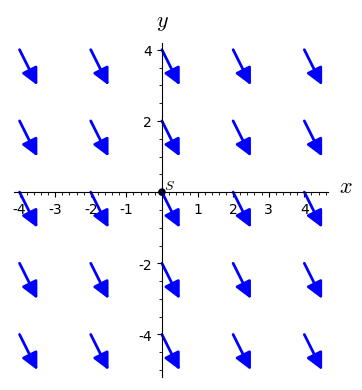

In [154]:
v.plot(chart=stereoN, chart_domain=stereoN, max_range=4, 
       number_values=5, scale=0.5, aspect_ratio=1) + \
 S.plot(stereoN, size=30, label_offset=0.2)

<p>The vector field appears homogeneous because its components w.r.t. the frame $\left(\frac{\partial}{\partial x}, \frac{\partial}{\partial y}\right)$ are constant:</p>

In [155]:
v.display(stereoN.frame())

v = d/dx - 2 d/dy

<p>On the contrary, once drawn in terms of the stereographic chart $(V, (x',y'))$, $v$ does no longer appears homogeneous:</p>

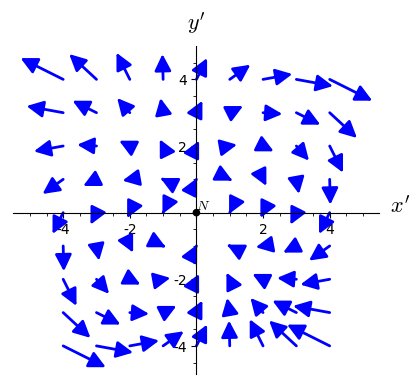

In [156]:
v.plot(chart=stereoS, chart_domain=stereoS, max_range=4, scale=0.02, 
       aspect_ratio=1) + \
 N.plot(chart=stereoS, size=30, label_offset=0.2)

<p>Finally, a 3D view of the vector field $v$ is obtained via the embedding $\Phi$:</p>

In [157]:
graph_v = v.plot(chart=cart, mapping=Phi, chart_domain=spher, 
                 number_values=11, scale=0.2)
show(graph_spher + graph_v, viewer=viewer3D)

Graphics3d Object

<p>Similarly, let us draw the first vector field of the stereographic frame from the North pole, namely $\frac{\partial}{\partial x}$:</p>

In [158]:
ex = stereoN.frame()[1]
ex

Vector field d/dx on the Open subset U of the 2-dimensional differentiable manifold S^2

In [159]:
graph_ex = ex.plot(chart=cart, mapping=Phi, chart_domain=spher,
                   number_values=11, scale=0.4, width=1, 
                   label_axes=False)
show(graph_spher + graph_ex, viewer=viewer3D)

Graphics3d Object

<p>For the second vector field of the stereographic frame from the North pole, namely $\frac{\partial}{\partial y}$, we get</p>

In [160]:
ey = stereoN.frame()[2]
ey

Vector field d/dy on the Open subset U of the 2-dimensional differentiable manifold S^2

In [161]:
graph_ey = ey.plot(chart=cart, mapping=Phi, chart_domain=spher,
                   number_values=11, scale=0.4, width=1, color='red', 
                   label_axes=False)
show(graph_spher + graph_ey, viewer=viewer3D)

Graphics3d Object

We may superpose the two graphs, to get a 3D view of the vector frame associated with the stereographic coordinates from the North pole:

In [162]:
graph_frame = graph_spher + graph_ex + graph_ey + \
              N.plot(cart, mapping=Phi, label_offset=0.05, size=5) + \
              S.plot(cart, mapping=Phi, label_offset=0.05, size=5)
show(graph_frame + sphere(color='lightgrey', opacity=0.4), viewer=viewer3D)

Graphics3d Object

The same scene rendered with Tachyon:

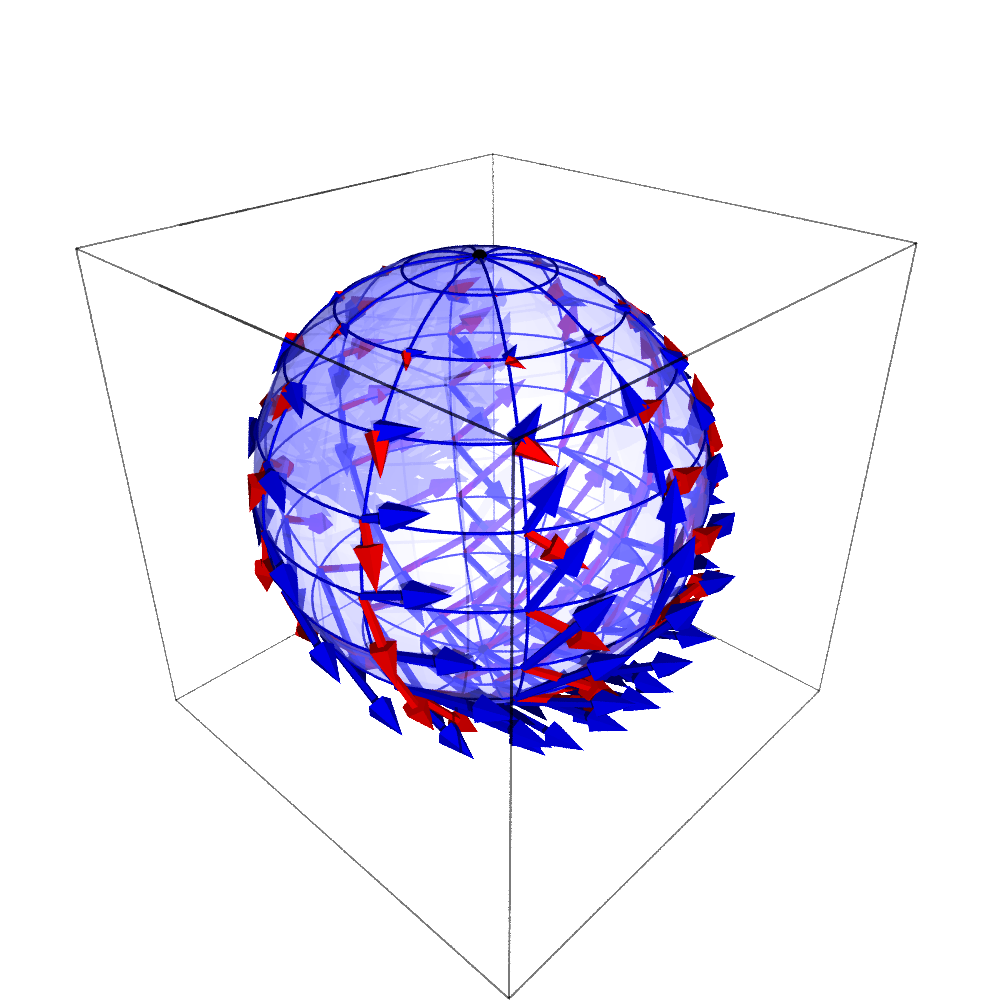

In [163]:
show(graph_frame + sphere(opacity=0.5), viewer='tachyon', figsize=10)

<h3>Vector fields acting on scalar fields</h3>
<p>$v$ and $f$ are both fields defined on the whole sphere (respectively a vector field and a scalar field). By the very definition of a vector field, $v$ acts on $f$:</p>

In [164]:
vf = v(f)
print(vf)
vf.display()

Scalar field v(f) on the 2-dimensional differentiable manifold S^2


v(f): S^2 --> R
on U: (x, y) |--> -4*(x - 2*y)/(x^4 + 2*x^2*y^2 + y^4 + 1)
on V: (xp, yp) |--> -4*(xp^3 - 2*xp^2*yp + xp*yp^2 - 2*yp^3)/(xp^4 + 2*xp^2*yp^2 + yp^4 + 1)
on A: (th, ph) |--> 2*((cos(ph) - 2*sin(ph))*cos(th) - cos(ph) + 2*sin(ph))*sin(th)/(cos(th)^2 + 1)

<p>Values of $v(f)$ at the North pole, at the equator point $E$ and at the South pole:</p>

In [165]:
vf(N)

0

In [166]:
vf(E)

4

In [167]:
vf(S)

0

<h2>1-forms</h2>
<p>A 1-form on $\mathbb{S}^2$ is a field of linear forms on the tangent spaces. For instance it can the differential of a scalar field:</p>

In [168]:
df = f.differential() ; print(df)

1-form df on the 2-dimensional differentiable manifold S^2


In [169]:
df.display()

df = -4*x/(x^4 + 2*x^2*y^2 + y^4 + 1) dx - 4*y/(x^4 + 2*x^2*y^2 + y^4 + 1) dy

In [170]:
print(df.parent())

Module Omega^1(S^2) of 1-forms on the 2-dimensional differentiable manifold S^2


In [171]:
df.parent()

Module Omega^1(S^2) of 1-forms on the 2-dimensional differentiable manifold S^2

<p><span id="cell_outer_146">The 1-form acting on a vector field:</span></p>

In [172]:
print(df(v)) ; df(v).display()

Scalar field df(v) on the 2-dimensional differentiable manifold S^2


df(v): S^2 --> R
on U: (x, y) |--> -4*(x - 2*y)/(x^4 + 2*x^2*y^2 + y^4 + 1)
on V: (xp, yp) |--> -4*(xp^3 - 2*xp^2*yp + xp*yp^2 - 2*yp^3)/(xp^4 + 2*xp^2*yp^2 + yp^4 + 1)
on A: (th, ph) |--> -2*(((cos(ph) - 2*sin(ph))*cos(th) - 3*cos(ph) + 6*sin(ph))*sin(th)^3 - 4*((cos(ph) - 2*sin(ph))*cos(th) - cos(ph) + 2*sin(ph))*sin(th))/(sin(th)^4 + 2*(cos(th) - 2)*sin(th)^2 - 4*cos(th) + 4)

<p>Let us check the identity $\mathrm{d}f(v) = v(f)$:</p>

In [173]:
df(v) == v(f)

True

<p>Similarly, we have $\mathcal{L}_v f = v(f)$:</p>

In [174]:
f.lie_derivative(v) == v(f)

True

<h2>Curves in $\mathbb{S}^2$</h2>
<p>In order to define curves in $\mathbb{S}^2$, we first introduce the field of real numbers $\mathbb{R}$ as a 1-dimensional smooth manifold with a canonical coordinate chart:</p>

In [175]:
R.<t> = RealLine() ; print(R)

Real number line R


In [176]:
R.category()

Category of smooth manifolds over Real Field with 53 bits of precision

In [177]:
dim(R)

1

In [178]:
R.atlas()

[Chart (R, (t,))]

<p>Let us define a <strong>loxodrome of the sphere</strong> in terms of its parametric equation with respect to the chart <span style="font-family: courier new,courier;">spher</span> = $(A,(\theta,\phi))$</p>

In [179]:
c = S2.curve({spher: [2*atan(exp(-t/10)), t]}, (t, -oo, +oo), name='c')

<p>Curves in $\mathbb{S}^2$ are considered as morphisms from the manifold $\mathbb{R}$ to the manifold $\mathbb{S}^2$:</p>

In [180]:
c.parent()

Set of Morphisms from Real number line R to 2-dimensional differentiable manifold S^2 in Category of smooth manifolds over Real Field with 53 bits of precision

In [181]:
c.display()

c: R --> S^2
   t |--> (x, y) = (cos(t)*e^(1/10*t), e^(1/10*t)*sin(t))
   t |--> (xp, yp) = (cos(t)*e^(-1/10*t), e^(-1/10*t)*sin(t))
   t |--> (th, ph) = (2*arctan(e^(-1/10*t)), t)

<p>The curve $c$ can be plotted in terms of stereographic coordinates $(x,y)$:</p>

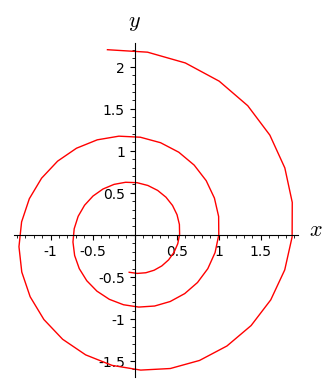

In [182]:
c.plot(chart=stereoN, aspect_ratio=1)

<p>We recover the well-known fact that the graph of a loxodrome in terms of stereographic coordinates is a <strong>logarithmic spiral</strong>.</p>
<p>Thanks to the embedding $\Phi$, we may also plot $c$ in terms of the Cartesian coordinates of $\mathbb{R}^3$:</p>

In [183]:
graph_c = c.plot(mapping=Phi, max_range=40, plot_points=200, 
                 thickness=2, label_axes=False)
show(graph_spher + graph_c, viewer=viewer3D)

Graphics3d Object

<p>The <strong>tangent vector field</strong> (or <strong>velocity vector</strong>) to the curve $c$ is</p>

In [184]:
vc = c.tangent_vector_field()
vc

Vector field c' along the Real number line R with values on the 2-dimensional differentiable manifold S^2

<p>$c'$ is a vector field <em>along</em> $\mathbb{R}$ taking its values in tangent spaces to $\mathbb{S}^2$:</p>

In [185]:
print(vc)

Vector field c' along the Real number line R with values on the 2-dimensional differentiable manifold S^2


<p>The set of vector fields along $\mathbb{R}$ taking their values on $\mathbb{S}^2$ via the differential mapping $c: \mathbb{R} \rightarrow \mathbb{S}^2$ is denoted by $\mathfrak{X}(\mathbb{R},c)$; it is a module over the algebra $C^\infty(\mathbb{R})$:</p>

In [186]:
vc.parent()

Module X(R,c) of vector fields along the Real number line R mapped into the 2-dimensional differentiable manifold S^2

In [187]:
vc.parent().category()

Category of modules over Algebra of differentiable scalar fields on the Real number line R

In [188]:
vc.parent().base_ring()

Algebra of differentiable scalar fields on the Real number line R

<p>A coordinate view of $c'$:</p>

In [189]:
vc.display()

c' = (1/10*cos(t)*e^(1/10*t) - e^(1/10*t)*sin(t)) d/dx + (cos(t)*e^(1/10*t) + 1/10*e^(1/10*t)*sin(t)) d/dy

<p>Let us plot the vector field $c'$ in terms of the stereographic chart $(U,(x,y))$:</p>

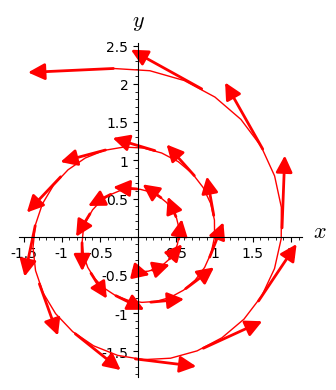

In [190]:
show(vc.plot(chart=stereoN, number_values=30, scale=0.5, color='red') +
     c.plot(chart=stereoN), aspect_ratio=1)

<p>A 3D view of $c'$ is obtained via the embedding $\Phi$:</p>

In [191]:
graph_vc = vc.plot(chart=cart, mapping=Phi, ranges={t: (-20, 20)}, 
                   number_values=30, scale=0.5, color='red', 
                   label_axes=False)
show(graph_spher + graph_c + graph_vc , viewer=viewer3D)

Graphics3d Object

## Riemannian metric on $\mathbb{S}^2$

The standard metric on $\mathbb{S}^2$ is that induced by the Euclidean metric of $\mathbb{R}^3$. Let us start by defining the latter:

In [192]:
h = R3.metric('h')
h[1,1], h[2,2], h[3, 3] = 1, 1, 1
h.display()

h = dX*dX + dY*dY + dZ*dZ

The metric $g$ on $\mathbb{S}^2$ is the pullback of $h$ associated with the embedding $\Phi$:

In [193]:
g = S2.metric('g')
g.set( Phi.pullback(h) )
print(g)

Riemannian metric g on the 2-dimensional differentiable manifold S^2


Note that we could have defined $g$ intrinsically, i.e. by providing its components in the two frames stereoN and stereoS, as we did for the metric $h$ on $\mathbb{R}^3$. Instead, we have chosen to get it as the pullback of $h$, as an example of pullback associated with some differential map.

The metric is a symmetric tensor field of type (0,2):

In [194]:
print(g.parent())

Module T^(0,2)(S^2) of type-(0,2) tensors fields on the 2-dimensional differentiable manifold S^2


In [195]:
g.tensor_type()

(0, 2)

In [196]:
g.symmetries()

symmetry: (0, 1); no antisymmetry


The expression of the metric in terms of the default frame on $\mathbb{S}^2$ (stereoN):

In [197]:
g.display()

g = 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) dx*dx + 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) dy*dy

We may factorize the metric components:

In [198]:
g[1,1].factor() ; g[2,2].factor()

4/(x^2 + y^2 + 1)^2

In [199]:
g.display()

g = 4/(x^2 + y^2 + 1)^2 dx*dx + 4/(x^2 + y^2 + 1)^2 dy*dy

A matrix view of the components of $g$ in the manifold's default frame:

In [200]:
g[:]

[4/(x^2 + y^2 + 1)^2                   0]
[                  0 4/(x^2 + y^2 + 1)^2]

Display in terms of the vector frame $(V, (\partial_{x'}, \partial_{y'}))$:

In [201]:
g.display(stereoS.frame())

g = 4/(xp^4 + yp^4 + 2*(xp^2 + 1)*yp^2 + 2*xp^2 + 1) dxp*dxp + 4/(xp^4 + yp^4 + 2*(xp^2 + 1)*yp^2 + 2*xp^2 + 1) dyp*dyp

In [202]:
g.display(spher.frame(), chart=spher)

g = dth*dth + sin(th)^2 dph*dph

The metric acts on vector field pairs, resulting in a scalar field:

In [203]:
print(g(v,v))

Scalar field g(v,v) on the 2-dimensional differentiable manifold S^2


In [204]:
g(v,v).parent()

Algebra of differentiable scalar fields on the 2-dimensional differentiable manifold S^2

In [205]:
g(v,v).display()

g(v,v): S^2 --> R
on U: (x, y) |--> 20/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1)
on V: (xp, yp) |--> 20*(xp^4 + 2*xp^2*yp^2 + yp^4)/(xp^4 + yp^4 + 2*(xp^2 + 1)*yp^2 + 2*xp^2 + 1)
on A: (th, ph) |--> 5*cos(th)^2 - 10*cos(th) + 5

The **Levi-Civita connection** associated with the metric $g$:

In [206]:
nab = g.connection()
print(nab)
nab

Levi-Civita connection nabla_g associated with the Riemannian metric g on the 2-dimensional differentiable manifold S^2


Levi-Civita connection nabla_g associated with the Riemannian metric g on the 2-dimensional differentiable manifold S^2

As a test, we verify that $\nabla_g$ acting on $g$ results in zero:

In [207]:
nab(g).display()

nabla_g(g) = 0

The nonzero Christoffel symbols of $g$ (skipping those that can be deduced by symmetry on the last two indices) w.r.t. two charts:

In [208]:
g.christoffel_symbols_display(chart=stereoN)

Gam^x_xx = -2*x/(x^2 + y^2 + 1) 
Gam^x_xy = -2*y/(x^2 + y^2 + 1) 
Gam^x_yy = 2*x/(x^2 + y^2 + 1) 
Gam^y_xx = 2*y/(x^2 + y^2 + 1) 
Gam^y_xy = -2*x/(x^2 + y^2 + 1) 
Gam^y_yy = -2*y/(x^2 + y^2 + 1)

In [209]:
g.christoffel_symbols_display(chart=spher)

Gam^th_ph,ph = -cos(th)*sin(th) 
Gam^ph_th,ph = cos(th)/sin(th)

$\nabla_g$ acting on the vector field $v$:

In [210]:
print(nab(v))

Tensor field nabla_g(v) of type (1,1) on the 2-dimensional differentiable manifold S^2


In [211]:
nab(v).display(stereoN.frame())

nabla_g(v) = -2*(x - 2*y)/(x^2 + y^2 + 1) d/dx*dx - 2*(2*x + y)/(x^2 + y^2 + 1) d/dx*dy + 2*(2*x + y)/(x^2 + y^2 + 1) d/dy*dx - 2*(x - 2*y)/(x^2 + y^2 + 1) d/dy*dy

## Curvature

The Riemann tensor associated with the metric $g$:

In [212]:
Riem = g.riemann()
print(Riem)
Riem.display()

Tensor field Riem(g) of type (1,3) on the 2-dimensional differentiable manifold S^2


Riem(g) = 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) d/dx*dy*dx*dy - 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) d/dx*dy*dy*dx - 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) d/dy*dx*dx*dy + 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) d/dy*dx*dy*dx

The components of the Riemann tensor in the default frame on $\mathbb{S}^2$:

In [213]:
Riem.display_comp()

Riem(g)^x_yxy = 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) 
Riem(g)^x_yyx = -4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) 
Riem(g)^y_xxy = -4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) 
Riem(g)^y_xyx = 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1)

<p>The components in the frame associated with spherical coordinates:</p>

In [214]:
Riem.display_comp(spher.frame(), chart=spher)

Riem(g)^th_ph,th,ph = sin(th)^2 
Riem(g)^th_ph,ph,th = -sin(th)^2 
Riem(g)^ph_th,th,ph = -1 
Riem(g)^ph_th,ph,th = 1

In [215]:
print(Riem.parent())

Module T^(1,3)(S^2) of type-(1,3) tensors fields on the 2-dimensional differentiable manifold S^2


In [216]:
Riem.symmetries()

no symmetry; antisymmetry: (2, 3)


The Riemann tensor associated with the Euclidean metric $h$ on $\mathbb{R}^3$ is identically zero:

In [217]:
h.riemann().display()

Riem(h) = 0

The Ricci tensor and the Ricci scalar:

In [218]:
Ric = g.ricci()
Ric.display()

Ric(g) = 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) dx*dx + 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) dy*dy

In [219]:
R = g.ricci_scalar()
R.display()

r(g): S^2 --> R
on U: (x, y) |--> 2
on V: (xp, yp) |--> 2
on A: (th, ph) |--> 2

Hence we recover the fact that $(\mathbb{S}^2,g)$ is a Riemannian manifold of constant positive curvature.

In dimension 2, the Riemann curvature tensor is entirely determined by the Ricci scalar $R$ according to
$$ R^i_{\ \, jlk} = \frac{R}{2} \left( \delta^i_{\ \, k} g_{jl} - \delta^i_{\ \, l} g_{jk} \right)$$
Let us check this formula here, under the form $R^i_{\ \, jlk} = -R g_{j[k} \delta^i_{\ \, l]}$:

In [220]:
delta = S2.tangent_identity_field()
Riem == - R*(g*delta).antisymmetrize(2,3)

True

Similarly the relation $\mathrm{Ric} = (R/2)\; g$ must hold:

In [221]:
Ric == (R/2)*g

True

The **Levi-Civita tensor** associated with $g$:

In [222]:
eps = g.volume_form()
print(eps)
eps.display()

2-form eps_g on the 2-dimensional differentiable manifold S^2


eps_g = 4/(x^4 + y^4 + 2*(x^2 + 1)*y^2 + 2*x^2 + 1) dx/\dy

In [223]:
eps.display(spher.frame(), chart=spher)

eps_g = sin(th) dth/\dph

The exterior derivative of the 2-form $\epsilon_g$:

In [224]:
print(eps.exterior_derivative())

3-form deps_g on the 2-dimensional differentiable manifold S^2


Of course, since $\mathbb{S}^2$ has dimension 2, all 3-forms vanish identically:

In [225]:
eps.exterior_derivative().display()

deps_g = 0

<h2>Non-holonomic frames</h2>
<p>Up to know, all the vector frames introduced on $\mathbb{S}^2$ have been coordinate frames. Let us introduce a non-coordinate frame on the open subset $A$. To ease the notations, we change first the default chart and default frame on $A$ to the spherical coordinate ones:</p>

In [226]:
A.default_chart()

Chart (A, (x, y))

In [227]:
A.default_frame()

Coordinate frame (A, (d/dx,d/dy))

In [228]:
A.set_default_chart(spher)
A.set_default_frame(spher.frame())
A.default_chart()

Chart (A, (th, ph))

In [229]:
A.default_frame()

Coordinate frame (A, (d/dth,d/dph))

<p>We define the new frame $e$ by relating it the coordinate frame $\left(\frac{\partial}{\partial\theta}, \frac{\partial}{\partial\phi}\right)$ via a field of tangent-space automorphisms:</p>

In [230]:
a = A.automorphism_field()
a[1,1], a[2,2] = 1, 1/sin(th)
a.display()

d/dth*dth + 1/sin(th) d/dph*dph

In [231]:
a[:]

[        1         0]
[        0 1/sin(th)]

In [232]:
e = spher.frame().new_frame(a, 'e')
print(e) ; e

Vector frame (A, (e_1,e_2))


Vector frame (A, (e_1,e_2))

In [233]:
e[1].display()

e_1 = d/dth

In [234]:
e[2].display()

e_2 = 1/sin(th) d/dph

In [235]:
A.frames()

[Coordinate frame (A, (d/dx,d/dy)),
 Coordinate frame (A, (d/dxp,d/dyp)),
 Coordinate frame (A, (d/dth,d/dph)),
 Vector frame (A, (d/dX,d/dY,d/dZ)) with values on the 3-dimensional differentiable manifold R^3,
 Vector frame (A, (e_1,e_2))]

<p>The new frame is an orthonormal frame for the metric $g$:</p>

In [236]:
g(e[1],e[1]).expr()

1

In [237]:
g(e[1],e[2]).expr()

0

In [238]:
g(e[2],e[2]).expr()

1

In [239]:
g[e,:]

[1 0]
[0 1]

In [240]:
g.display(e)

g = e^1*e^1 + e^2*e^2

In [241]:
eps.display(e)

eps_g = e^1/\e^2

<p>It is non-holonomic: its structure coefficients are not identically zero:</p>

In [242]:
e.structure_coeff()[:]

[[[0, 0], [0, 0]], [[0, -cos(th)/sin(th)], [cos(th)/sin(th), 0]]]

In [243]:
e[2].lie_derivative(e[1]).display(e)

-cos(th)/sin(th) e_2

<p>while we have of course</p>

In [244]:
spher.frame().structure_coeff()[:]

[[[0, 0], [0, 0]], [[0, 0], [0, 0]]]